# Assignment 1 : EDA

## Task 1: Exploratory Data Analysis

### Importing Libraries:

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


### Importing Data:

In [22]:
df = pd.read_csv("vehicles.csv")

/var/folders/r4/9ncp61z543v94_5sltg11_bm0000gn/T/ipykernel_7041/1559163291.py:1: DtypeWarning: Columns (73,74,76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("vehicles.csv")


### Data Exploration:

In [23]:
# Getting the number of rows and columns
df.shape

(40081, 83)

In [24]:
# Exploring the top 5 rows
df.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [25]:
# Understand the types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40081 entries, 0 to 40080
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        40081 non-null  float64
 1   barrelsA08       40081 non-null  float64
 2   charge120        40081 non-null  float64
 3   charge240        40081 non-null  float64
 4   city08           40081 non-null  int64  
 5   city08U          40081 non-null  float64
 6   cityA08          40081 non-null  int64  
 7   cityA08U         40081 non-null  float64
 8   cityCD           40081 non-null  float64
 9   cityE            40081 non-null  float64
 10  cityUF           40081 non-null  float64
 11  co2              40081 non-null  int64  
 12  co2A             40081 non-null  int64  
 13  co2TailpipeAGpm  40081 non-null  float64
 14  co2TailpipeGpm   40081 non-null  float64
 15  comb08           40081 non-null  int64  
 16  comb08U          40081 non-null  float64
 17  combA08     

In [67]:
class DataFrameStats:
    def __init__(self, df: pd.DataFrame):
        """
        initialize new pandas DF
        """
        self.df = df.select_dtypes(include=['number'])

    def get_min(self):
        """
        Return min value
        """
        return self.df.min()

    def get_max(self):
        """
        return max vaule
        """
        return self.df.max()

    def get_q1(self):
        """
        return Q1
        """
        return self.df.quantile(0.25)

    def get_median(self):
        """
        return median
        """
        return self.df.median()

    def get_mean(self):
        """
        Return mean
        """
        return self.df.mean()

    def get_q3(self):
        """
        returns Q3
        """
        return self.df.quantile(0.75)

    def get_summary(self):
        """
        Get the full summary of data
        """
        summary = pd.DataFrame({
            'Min': self.get_min(),
            'Q1': self.get_q1(),
            'Median': self.get_median(),
            'Mean': self.get_mean(),
            'Q3': self.get_q3(),
            'Max': self.get_max()
        })
        return summary
    
    def plot_summary(self):
        """
        Plot heatmap of summary stats
        """
        summary_df = self.get_summary()
        
        # Create the fig
        plt.figure(figsize=(12, 8))
        sns.heatmap(summary_df, annot=True, fmt=".2f", cmap="Blues", cbar_kws={'label': 'Value'})
        
        # Add content to fig
        plt.title('Summary Stats (min, q1, median, mean, q3, max)')
        plt.xlabel('Features')
        plt.ylabel('Stats')
        plt.xticks(rotation=90)
        plt.show()
        
    def plot_boxplot_with_swarm(self, x_col: str, y_col: str):
        """
        Plot a boxplot with swarm plot
        """
        
        # Logic to handle col name issues
        if x_col not in self.df.columns or y_col not in self.df.columns:
            raise ValueError(f"Either {x_col} or {y_col} does not exist in the DataFrame.")

        # Set style
        plt.style.use('ggplot')

        # Create the fig
        plt.figure(figsize=(10, 6))
        
        # Add boxplot
        sns.boxplot(x=x_col, y=y_col, data=self.df, color='white', fliersize=2, boxprops=dict(facecolor='None'))

        # Add swarmplot
        sns.swarmplot(x=x_col, y=y_col, data=self.df, color='black', size=2, alpha=0.7)

        # Add labels
        plt.title(f'{y_col} vs {x_col}')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.xticks(rotation=90)

        # Show plot
        plt.show()
        
    def plot_scatter_with_boxplot_aggregated(self, x_col: str, y_col: str, agg_func='median'):
        """
        Plot a boxplot with swarm plot, but aggregated to reproduce other fig
        """
        
        # Filter bad cols
        if x_col not in self.df.columns or y_col not in self.df.columns:
            raise ValueError(f"Either {x_col} or {y_col} does not exist in the DataFrame.")
    
        # Group the data by col1 (year) and aggregate the values 
        aggregated_df = self.df.groupby(x_col)[y_col].agg(agg_func).reset_index()
    
        # Create fig
        plt.style.use('ggplot')
        plt.figure(figsize=(10, 6))
    
        # Add scatter plot
        sns.scatterplot(x=x_col, y=y_col, data=aggregated_df, color='black', s=50)
    
        # Add boxplot
        sns.boxplot(x=x_col, y=y_col, data=self.df, color='white', fliersize=2, boxprops=dict(facecolor='None'))
    
        # Add labels
        plt.title(f'{y_col} vs {x_col} (Aggregated by {agg_func})')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.xticks(rotation=90)
    
        # show plot
        plt.show()


In [63]:
sdf = DataFrameStats(df)

print(sdf.get_summary())

                      Min            Q1      Median          Mean  \
barrels08            0.06     14.330870     16.4805     17.363564   
barrelsA08           0.00      0.000000      0.0000      0.220069   
charge120            0.00      0.000000      0.0000      0.000000   
charge240            0.00      0.000000      0.0000      0.036086   
city08               6.00     15.000000     17.0000     18.213318   
city08U              0.00      0.000000      0.0000      5.494777   
cityA08              0.00      0.000000      0.0000      0.616077   
cityA08U             0.00      0.000000      0.0000      0.466164   
cityCD               0.00      0.000000      0.0000      0.000471   
cityE                0.00      0.000000      0.0000      0.274113   
cityUF               0.00      0.000000      0.0000      0.001279   
co2                 -1.00     -1.000000     -1.0000     80.114069   
co2A                -1.00     -1.000000     -1.0000      5.713131   
co2TailpipeAGpm      0.00      0.0

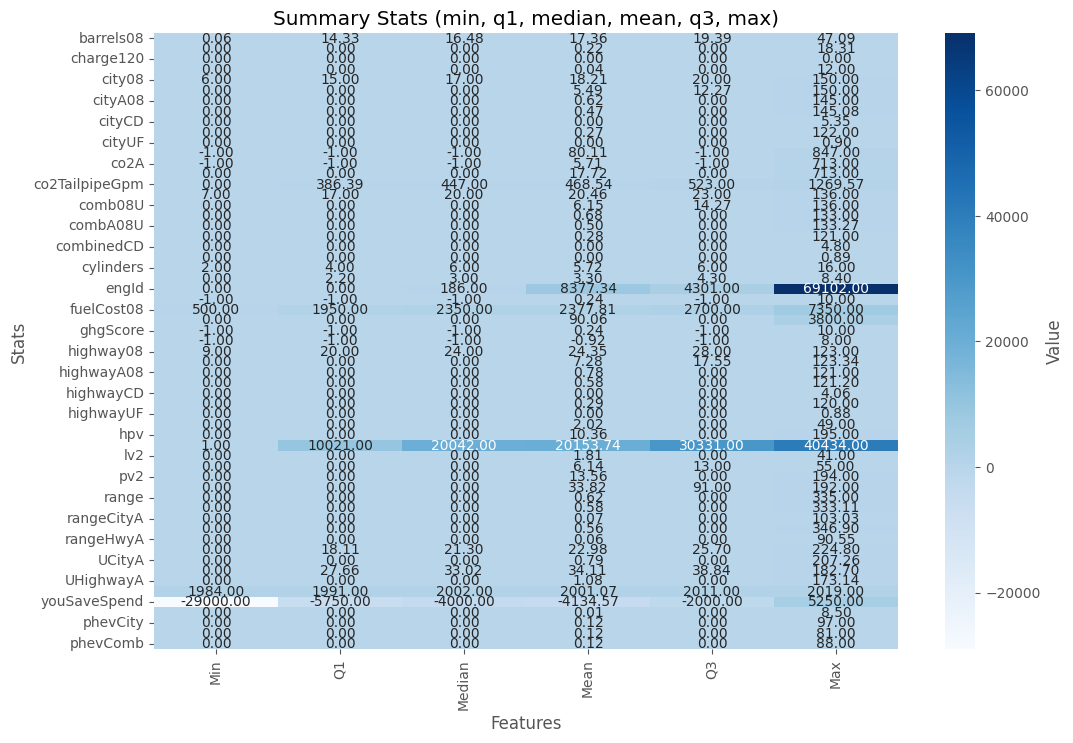

In [64]:
sdf.plot_summary()


/Users/alkhalifas/Documents/Github/cs6140-machine-learning/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 94.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/alkhalifas/Documents/Github/cs6140-machine-learning/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 93.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/alkhalifas/Documents/Github/cs6140-machine-learning/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 90.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/alkhalifas/Documents/Github/cs6140-machine-learning/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 91.3% of the points cannot be placed; y

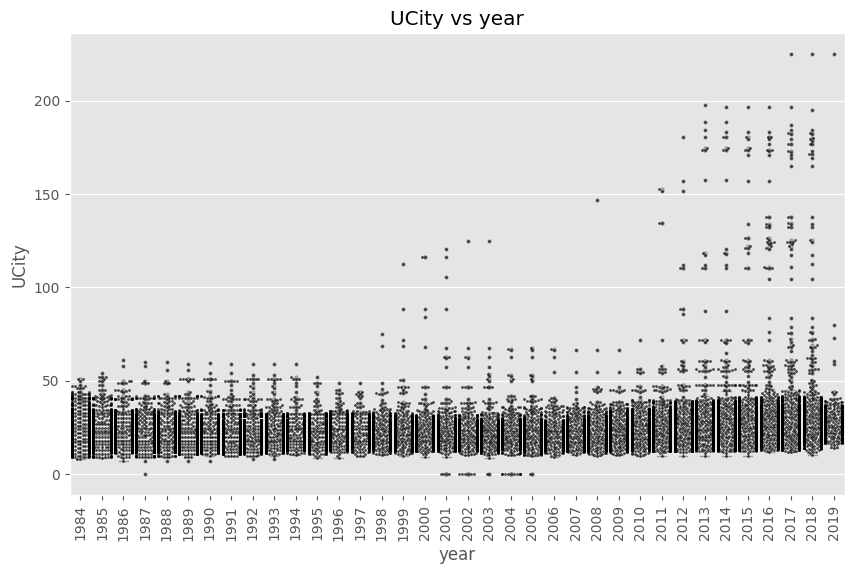

In [65]:
sdf.plot_boxplot_with_swarm(x_col='year', y_col='UCity')

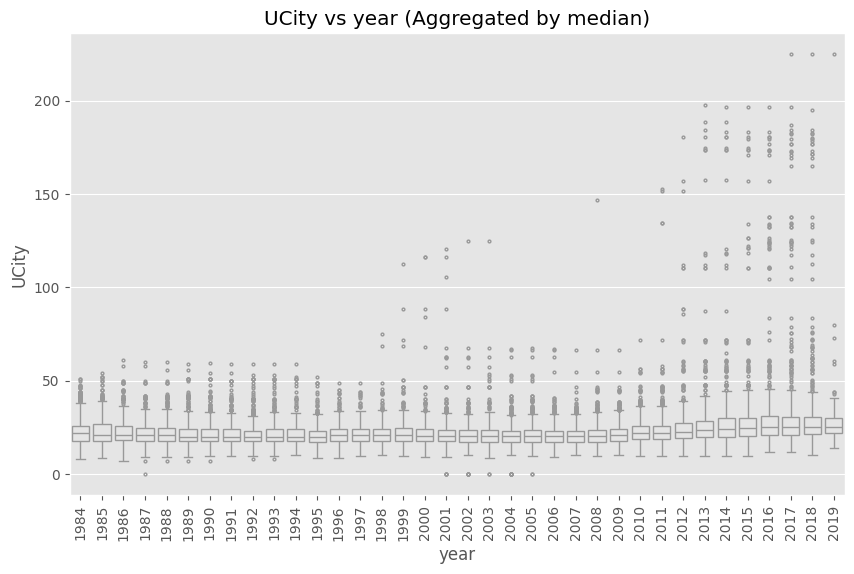

In [68]:
sdf.plot_scatter_with_boxplot_aggregated(x_col='year', y_col='UCity')

In [37]:
# Get some descriptive statistics about the data
df.describe()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
count,40081.000000,40081.000000,40081.0,40081.000000,40081.000000,40081.000000,40081.000000,40081.000000,40081.000000,40081.000000,...,40081.000000,40081.000000,40081.000000,40081.000000,40081.000000,40081.000000,40081.000000,40081.000000,40081.000000,40081.000000
mean,17.363564,0.220069,0.0,0.036086,18.213318,5.494777,0.616077,0.466164,0.000471,0.274113,...,22.981798,0.789437,34.105932,1.076877,2001.068586,-4134.565006,0.007497,0.122851,0.123375,0.122527
std,4.597119,1.143270,0.0,0.534894,7.397433,11.027993,4.739349,4.563736,0.039282,3.513989,...,10.473444,6.612445,10.790921,7.205627,10.908967,3256.499139,0.195365,2.599224,2.510273,2.542274
min,0.060000,0.000000,0.0,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1984.000000,-29000.000000,0.000000,0.000000,0.000000,0.000000
25%,14.330870,0.000000,0.0,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.110500,0.000000,27.661300,0.000000,1991.000000,-5750.000000,0.000000,0.000000,0.000000,0.000000
50%,16.480500,0.000000,0.0,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.296500,0.000000,33.024600,0.000000,2002.000000,-4000.000000,0.000000,0.000000,0.000000,0.000000
75%,19.388824,0.000000,0.0,0.000000,20.000000,12.273600,0.000000,0.000000,0.000000,0.000000,...,25.700000,0.000000,38.839200,0.000000,2011.000000,-2000.000000,0.000000,0.000000,0.000000,0.000000
max,47.087143,18.311667,0.0,12.000000,150.000000,150.000000,145.000000,145.083500,5.350000,122.000000,...,224.800000,207.262200,182.700000,173.143600,2019.000000,5250.000000,8.500000,97.000000,81.000000,88.000000


In [27]:
# Understand the null values
df.isnull().sum()

barrels08         0
barrelsA08        0
charge120         0
charge240         0
city08            0
              ...  
modifiedOn        0
startStop     31704
phevCity          0
phevHwy           0
phevComb          0
Length: 83, dtype: int64

In [28]:

df['fuelType'].value_counts()

fuelType
Regular                        25997
Premium                        11067
Gasoline or E85                 1287
Diesel                          1142
Electricity                      168
Premium or E85                   125
Midgrade                         100
CNG                               60
Premium and Electricity           47
Regular Gas and Electricity       29
Premium Gas or Electricity        28
Gasoline or natural gas           20
Gasoline or propane                8
Regular Gas or Electricity         3
Name: count, dtype: int64

In [29]:
df['fuelType1'].value_counts()


fuelType1
Regular Gasoline     27344
Premium Gasoline     11267
Diesel                1142
Electricity            168
Midgrade Gasoline      100
Natural Gas             60
Name: count, dtype: int64